In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.pandas.read_csv("data/cancer.csv", sep=',')
df

,cancer,population
0,1,445
1,0,559
2,3,677
3,4,681
4,3,746
...,...,...
296,250,62931
297,267,63476
298,244,66676
299,248,74005


In [37]:
X = df['cancer'].values
Y = df['population'].values / 10000

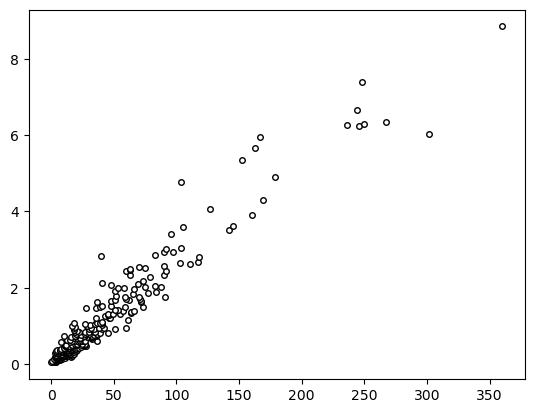

In [38]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.show()

In [39]:
from mltools.estimators import LinearLS
from mltools.scores import modified_zscore

In [40]:
regr_ls = LinearLS()
regr_ls.fit(X[:,None], Y)
mod_ls = regr_ls.model
print(np.asarray(mod_ls.param))

[0.08690758 0.02614081]


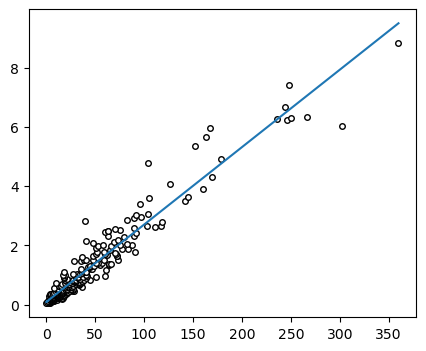

In [41]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]))
plt.show()

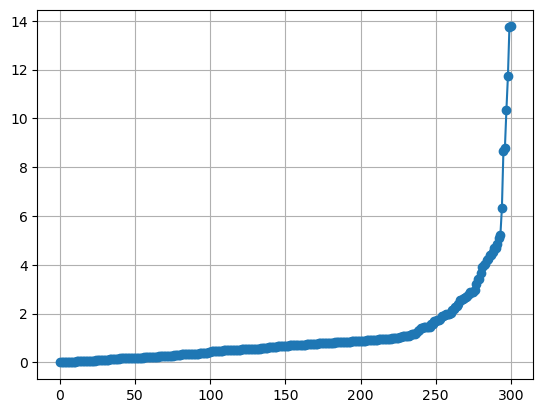

In [42]:
E = abs(mod_ls.evaluate(X[:,None]) - Y)
Z = modified_zscore(E)
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()

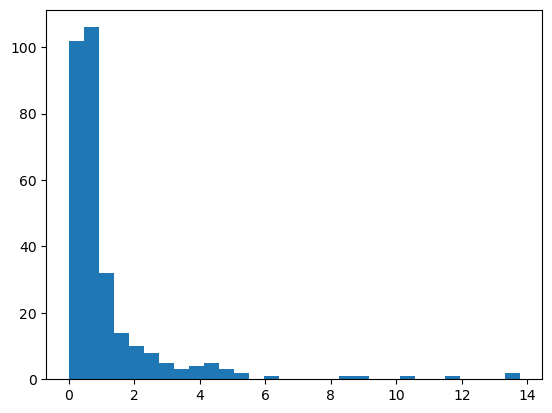

In [43]:
plt.hist(abs(Z), bins=30) #, density=True)
plt.show()

In [49]:
X1 = X[abs(Z) < 3.5]
Y1 = Y[abs(Z) < 3.5]

In [50]:
regr_ls1 = LinearLS()
regr_ls1.fit(X1[:,None], Y1)
mod_ls1 = regr_ls1.model
print(np.asarray(mod_ls1.param))

[0.05823611 0.02578449]


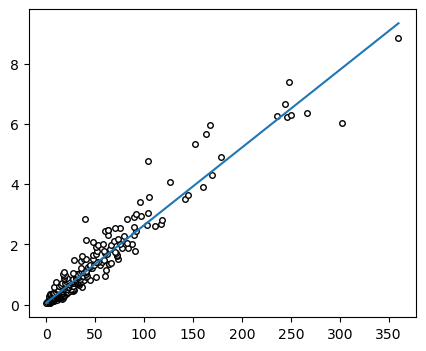

In [51]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls1.evaluate(X[:,None]))
plt.show()

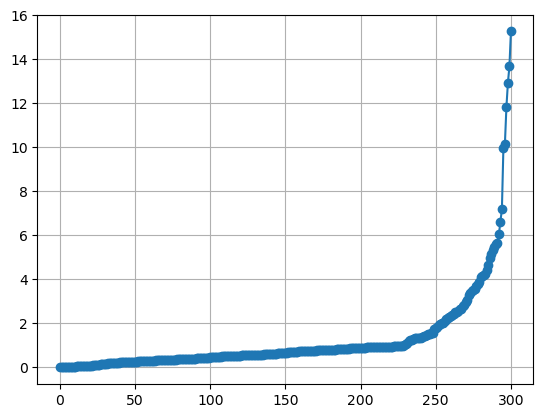

In [52]:
E1 = abs(mod_ls1.evaluate(X[:,None]) - Y)
Z1 = modified_zscore(E1)
plt.plot(sorted(abs(Z1)), marker='o')
plt.grid(1)
plt.show()

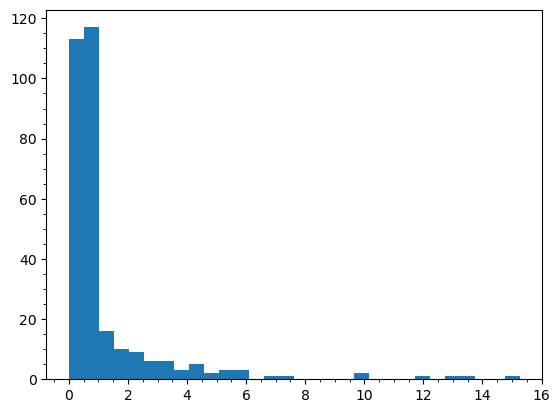

In [53]:
plt.hist(abs(Z1), bins=30) #, density=True)
plt.minorticks_on()
plt.show()

In [27]:
X2 = X[abs(Z) < 1.7]
Y2 = Y[abs(Z) < 1.7]

In [28]:
regr_ls2 = LinearLS()
regr_ls2.fit(X2[:,None], Y2)
mod_ls2 = regr_ls2.model
print(np.asarray(mod_ls2.param))

[5.61351785 0.99024023]


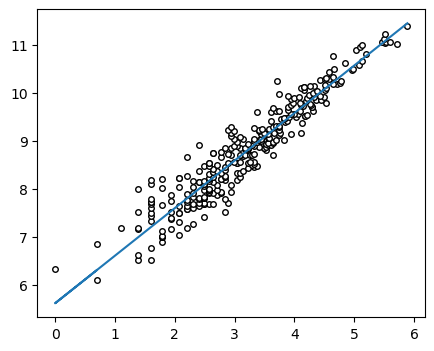

In [29]:
plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls2.evaluate(X[:,None]))
plt.show()

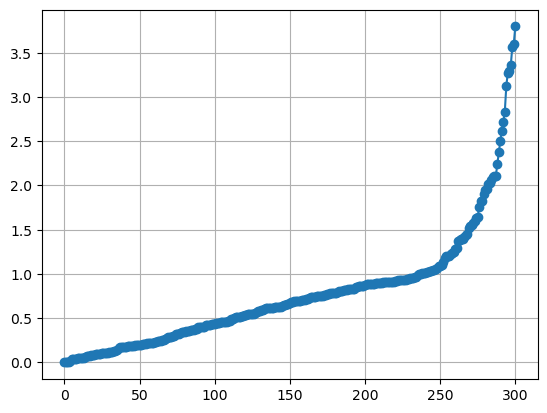

In [31]:
E2 = abs(mod_ls2.evaluate(X[:,None]) - Y)
Z2 = modified_zscore(E2)
plt.plot(sorted(abs(Z2)), marker='o')
plt.grid(1)
plt.show()

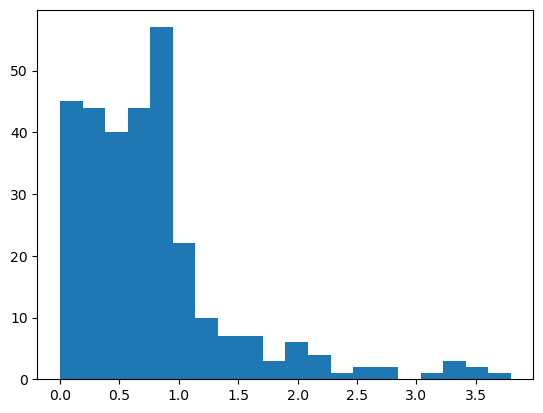

In [32]:
plt.hist(abs(Z2), bins=20) #, density=True)
plt.show()

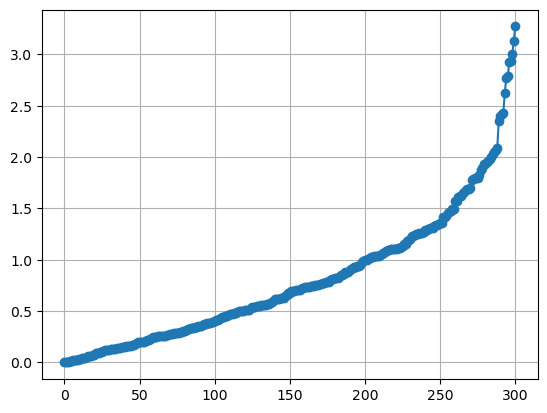

In [68]:
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()